# "Продвинутый Python". Магистерская программа ВШЭ.

**Цель курса**: получить предстваление о принципах создания сервисов и реализовать их в собственном ML-проекте.

**Ключевые навыки**: ООП, Django, luigi

### Отчётность

Зачётные баллы будут даваться за:

1) __Курсовой проект__ 

В курсовом проекте необходимо будет сделать сервис, например, для решения какой-нибудь ML-задачи (но не обязательно). Список требований к сервису будет озвучен позже. За проект можно получить до **6 баллов**, причем проект должен сдаваться не за один раз. 

2) __Контрольные работы, контесты__ (но это не точно)

Проводятся на занятиях. Могут принести до **2 баллов**.

3) __Домашние задания__

Могут принести неопределенное количество баллов.

4) __Задания на занятии__

Несложные задания за мелкие баллы.

Суммарно можно будет **получить больше 10 баллов**. **Баллов хватит на всех :)**

Все задачи должны быть оформлены в соответствии с PEP 8.

## Занятие №0. Core libraries. Разминка.

In [1]:
import sys

**Как получить путь к интерпретатору?**

In [2]:
sys.executable;

**Как узнать, где ищутся модули для импорта?**

In [3]:
sys.path;

**Что может помочь написать кросс-платформенный код?**

In [4]:
sys.platform

'darwin'

**Как перенаправить поток вывода?**

In [5]:
with open('log.txt', 'w') as f:
    print(2, file=f)

### Задача №0

Вывести распределение слов в Zen of Python.

In [6]:
from io import StringIO

import sys

Перенаправим поток вывода в переменную

In [7]:
stdout = sys.stdout

text_from_this = StringIO()
sys.stdout = text_from_this

Запишем Zen of Python в переменную `text_from_this` и вернем консольный вывод

In [8]:
import this

In [9]:
sys.stdout = stdout 

In [10]:
import re
from collections import Counter, OrderedDict

In [11]:
mapping_rules = {
    "[-.\n,*!]": " ",
    "n't": " not",
    "'re": " are",
    "it's": "it is",
    "let's": "let us"
}

Подумайте, в чем непотимальность следующего блока? Как сделать оптимальным?

In [12]:
zen_string = text_from_this.getvalue().lower()

for rule in mapping_rules:
    zen_string = re.sub(rule, mapping_rules[rule], zen_string)

In [13]:
words_distribution = Counter(zen_string.split())
words_distribution.most_common()

[('is', 11),
 ('better', 8),
 ('than', 8),
 ('the', 6),
 ('to', 5),
 ('of', 3),
 ('are', 3),
 ('although', 3),
 ('never', 3),
 ('be', 3),
 ('one', 3),
 ('it', 3),
 ('idea', 3),
 ('complex', 2),
 ('special', 2),
 ('not', 2),
 ('should', 2),
 ('unless', 2),
 ('obvious', 2),
 ('way', 2),
 ('do', 2),
 ('may', 2),
 ('now', 2),
 ('if', 2),
 ('implementation', 2),
 ('explain', 2),
 ('a', 2),
 ('zen', 1),
 ('python', 1),
 ('by', 1),
 ('tim', 1),
 ('peters', 1),
 ('beautiful', 1),
 ('ugly', 1),
 ('explicit', 1),
 ('implicit', 1),
 ('simple', 1),
 ('complicated', 1),
 ('flat', 1),
 ('nested', 1),
 ('sparse', 1),
 ('dense', 1),
 ('readability', 1),
 ('counts', 1),
 ('cases', 1),
 ('enough', 1),
 ('break', 1),
 ('rules', 1),
 ('practicality', 1),
 ('beats', 1),
 ('purity', 1),
 ('errors', 1),
 ('pass', 1),
 ('silently', 1),
 ('explicitly', 1),
 ('silenced', 1),
 ('in', 1),
 ('face', 1),
 ('ambiguity', 1),
 ('refuse', 1),
 ('temptation', 1),
 ('guess', 1),
 ('there', 1),
 ('and', 1),
 ('preferably'

### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [67]:

import numpy as np
from tqdm import trange, tqdm_notebook
from time import time
import matplotlib.pyplot as plt
from functools import lru_cache
from collections import deque
import copy
from functools import partial
from itertools import permutations
from datetime import datetime
from memory_profiler import memory_usage


In [14]:
# Bad way

def delete_zeros_from_array(array):
    #     logic for deleting zeroes
    
    last_array_index = len(array) - 1
    last_nonzero_index = 0
    i = 0
    
    while i <= last_array_index:
        if array[i] != 0:
            array[last_nonzero_index] = array[i]
            i += 1
            last_nonzero_index += 1
        else:
            i += 1
    
    return array[:last_nonzero_index]

In [15]:
# Not bad way


def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
        
    last_array_index = len(array) - 1
    last_nonzero_index = 0
    i = 0
    
    while i <= last_array_index:
        if array[i] != element:
            array[last_nonzero_index] = array[i]
            i += 1
            last_nonzero_index += 1
        else:
            i += 1
    
    return array[:last_nonzero_index]


delete_zeros_from_array = partial(delete_elements_from_array, element=0)

In [17]:


def input_generator(out_lenght):
    """
        Функция генерирует лист интовых чисел, 
        который асимптотически содержит чуть больше трети нулей.
        
        :param out_lenght: длина генерируемого листа
        :type out_lenght: int
        
        :returns: Лист интовых чисел
        :rtype: list
    """    
    input_generated = np.random.randint(0, 100, out_lenght)
    multiplier = np.random.randint(0, 3, out_lenght)
    input_generated = list(input_generated * multiplier)
    return input_generated

In [20]:

MAX_LENGHT = 100
N_ITER = 10000
list_of_time = []

for lenght in trange(MAX_LENGHT):
    avg_time = 0
    for i in range(N_ITER):
        inp = input_generator(lenght)
        time0 = time()
        tmp = delete_zeros_from_array(inp)
        time1 = time()
        avg_time += time1 - time0
    avg_time = avg_time / N_ITER
    list_of_time.append(avg_time)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.33it/s]


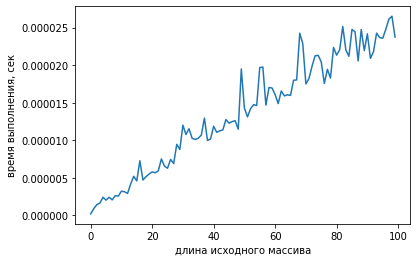

In [27]:
plt.plot(np.arange(MAX_LENGHT), list_of_time)
plt.xlabel('длина исходного массива')
plt.ylabel('время выполнения, сек')
plt.show()

Зачем нужна doc string? Как её посмотерть?

> чтобы пользователь мог иметь быстрый доступ к краткой документации по функции (или классу, например), а именно: описания входных и выходных параметров, их типов данных, что делает функция (или класс)

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [22]:
def abs_complex(complex_number):
    """
        Функция считает модуль комплексного числа.
        
        :param complex_number: Комплексное число
        :type complex_number: complex
        
        :returns: Модуль комплексного числа
        :rtype: float
    """     
    return ((complex_number.imag)**2 + (complex_number.real)**2)**(1/2)


def einstein_comparisor(complex0, complex1, complex2):
    """
        Функция без использования функций min, max, sort и т.д.
        сортирует полученные комплексные числа.
        
        :param complex0: первое комплексное число
        :type complex0: complex
        :param complex1: второе комплексное число
        :type complex1: complex
        :param complex2: третье комплексное число
        :type complex2: complex
        
        :returns: Наименьшее по модулю комплексное число
        :rtype: complex
    """     
    abs_complex0 = abs_complex(complex0)
    abs_complex1 = abs_complex(complex1)
    abs_complex2 = abs_complex(complex2)
    
    if abs_complex0 < abs_complex1:
        if abs_complex0 < abs_complex2:
            return complex0
        else:
            return complex2
    else:
        if abs_complex1 < abs_complex2:
            return complex1
        else:
            return complex2

In [23]:
a = 3 + 4j
b = 0 + 2j
c = 4 + 0j
print(abs(a), abs(b), abs(c))
print(min(abs(a), abs(b), abs(c)))
print(einstein_comparisor(a,b,c))

5.0 2.0 4.0
2.0
2j


### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [81]:
class ATM:
    
    def __init__(self):
        pass

    
    def greatest_common_divisor(self, n1, n2):
        
        while n2 != 0:
            n1, n2 = n2, n1 % n2
        return n1
    
    
    @lru_cache(maxsize=1000)
    def fibonacci_generator(self, n):
        
        if n < 0:
            print('отрицательное n')
            return
        elif n <= 2:
            return n-1
        a, b = 0, 1
        for i in range(n-2):
            a, b = b, a + b
        return b
        
        
    def median(self, inp):
        
        elements = dict()
        
        for i in inp:
            if not i in elements:
                elements[i] = 0
            elements[i] += 1

        sorted_elements = sorted(elements.keys())
        pos = 0
        
        for x in sorted_elements:
            pos += elements[x]
            if pos > len(inp) // 2:
                return x
     
    
    def transform(self, card_number, password):
        
        chunks = list(map(int, card_number.split()))
        f_chunks = list(map(self.fibonacci_generator, chunks))
        
        gcds = []
        
        for f in permutations(f_chunks):
            f = map(str, f)
            f = int(''.join(f))
            gcds.append(self.greatest_common_divisor(f, password))
                
        return self.median(gcds)

In [82]:
bankomat = ATM()
bankomat.transform('5536 9138 1063 8599', 1234)

2

### Домашнее задание №3 [0 - 0.1 балла]

**Условие:**
    
Сравнить скорость работы и потребление памяти list и deque.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [51]:
def speed_mem_test(obj_type, obj_len, operation, factor, percentiles):
    """
        Функция считает время выполнения factor операций operation
        над объектом типа obj_type длины obj_len.
        
        :param obj_type: Тип первого массива
        :param obj_len: Длина генерируемого массива
        :param operation: Операция над массивом типа obj_type и ее параметры (от нуля до двух)
        :param factor: Количество повторения операции
        :param percentiles: Перцентили распределения времени операции
        
        :returns: среднее время выполнения операции и его percentiles перцентили 
    """ 
    
    times_list = []
    mems_list = []
    
    for i in range(factor):
        array = np.random.rand(obj_len)
        obj = obj_type(array)
        
        if len(operation) == 1:
            time0 = time()
            operation[0](obj)
            time1 = time() - time0
            times_list.append(time1)
            mems_list.append(sys.getsizeof(obj))
        elif len(operation) == 2:
            time0 = time()
            operation[0](obj, operation[1])
            time1 = time() - time0
            times_list.append(time1)
            mems_list.append(sys.getsizeof(obj))
        elif len(operation) == 3:
            time0 = time()
            operation[0](obj, operation[1], operation[2])
            time1 = time() - time0
            times_list.append(time1)
            mems_list.append(sys.getsizeof(obj))
        else:
            print('invalid parameters count')
            break
            
    return [obj_len] + [np.mean(times_list)] + [np.percentile(times_list, i) for i in percentiles], \
           [obj_len] + [np.mean(mems_list)] + [np.percentile(mems_list, i) for i in percentiles]

    
def types_speed_comparer(type1, type2, operation1, operation2, maxlen=50000,
                         factor=10, stride=100, percentiles=(25,75)):
    """
        Функция считает квартили времени выполнения операции
        operation1 и operation2 над объектами типа type1 и type2.
        
        :param type1: Тип данных первый
        :param type2: Тип данных второй
        :param operation1: Операция над массивом типа type1
        :param operation2: Операция над массивом типа type2
        :param maxlen: Максимальная длина входного объекта
        :param factor: Количество повторения операции
        :param percentiles: Перцентили распределения времени операции
        
        :returns: Массив времени выполнения операций для типа 1
                  Массив затраченной памяти после выполнения операций для типа 1
                  Массив времени выполнения операций для типа 2
                  Массив затраченной памяти после выполнения операций для типа 2
    """   
    if (maxlen % stride == 0) and (maxlen >= stride):
        resultlen = int(maxlen/stride) + 1
    else:
        print('stride is bigger or not proportional to the maxlen')
        return -1, -1
    
    type1_times = np.zeros((resultlen, 4))
    type2_times = np.zeros((resultlen, 4))
    type1_mems = np.zeros((resultlen, 4))
    type2_mems = np.zeros((resultlen, 4))
    
    ### итерируемся по длине массива от 0 до maxlen
    i = 0
    for l in tqdm_notebook(range(1, maxlen+2, stride)):
        type1_times[i, :], type1_mems[i, :] = speed_mem_test(type1, l, operation1, factor, percentiles)
        type2_times[i, :], type2_mems[i, :] = speed_mem_test(type2, l, operation2, factor, percentiles)
        i += 1
        
    return type1_times, type1_mems, type2_times, type2_mems


def plot_times(metric0, metric1, metric_name, label0='list', label1='deque', perc=PERCENTILES):
    """
        Функция строит графики времени выполнения операции.
        
        :param metric0: Массив значений метрики операций для первого типа
        :param metric1: Массив значений метрики операций для первого типа
        :param metric_name: Название метрики
        :param label0: Название первого исследуемого типа  
        :param label1: Название второго исследуемого типа  
        :param perc: Перцентили для построения распределения 
        (если пустое множество, то перцентили не отображаются)
        
        :returns: Графики распределений значений метрики
    """      
    plt.figure(figsize=(12,4))
    if perc:
        labels = ['mean'] + [f'{perc[i]}% qntl' for i in range(len(perc))]
        for i in range(len(perc)+1):
            plt.plot(metric0[:,0], metric0[:,i+1], label=f'{label0} {labels[i]}')
            plt.plot(metric1[:,0], metric1[:,i+1], label=f'{label1} {labels[i]}')
    else:
        labels = ['mean']
        plt.plot(metric0[:], label=f'{label0}')
        plt.plot(metric1[:], label=f'{label1}')
    plt.legend()
    plt.xlabel('lenght')
    plt.ylabel(metric_name)
    plt.grid()
    plt.show()

PERCENTILES = (25, 75)


**Инсертим элемент в начало**

In [93]:
list_times, list_mems, deque_times, deque_mems = \
    types_speed_comparer(list, deque, (list.insert, 0, 4), (deque.appendleft, 4), 
                         30000, factor=300, stride=300, percentiles=PERCENTILES)

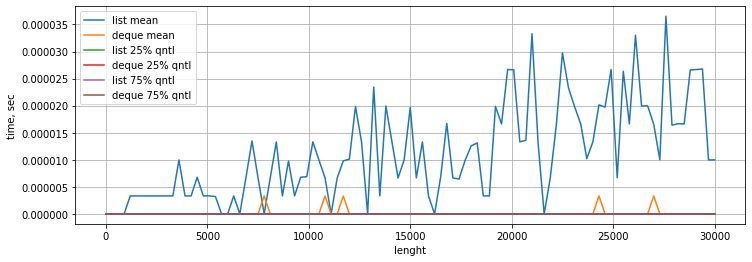

In [94]:
plot_times(list_times, deque_times, 'time, sec')

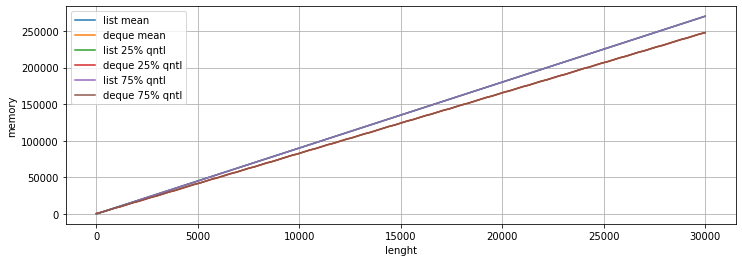

In [95]:
plot_times(list_mems, deque_mems, 'memory')

Видно, что у list время добавления элемента в начало линейно зависит от длины структуры, а у deque - константно с несколькими всплесками

По памяти более затратен также list

**Инсертим элемент в конец**

In [64]:
list_times, list_mems, deque_times, deque_mems = \
    types_speed_comparer(list, deque, (list.append, 4), (deque.append, 4), 
                         30000, factor=1000, stride=100, percentiles=PERCENTILES)

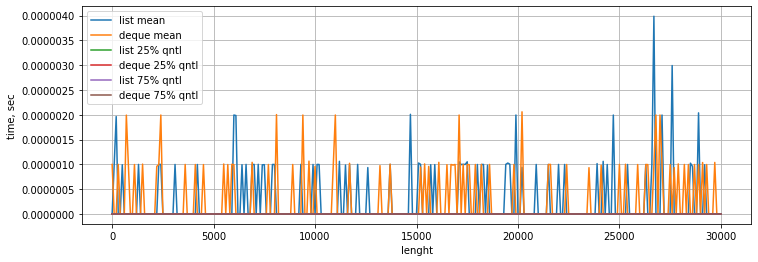

In [65]:
plot_times(list_times, deque_times, 'time, sec')

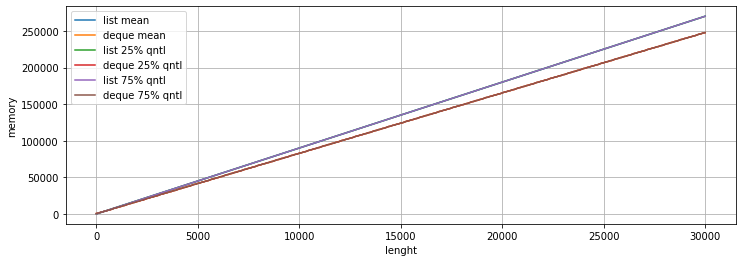

In [66]:
plot_times(list_mems, deque_mems, 'memory')

Время вставки элемента в конец структуры примерно одинаково константно у обеих структур

По памяти более затратен также list

**Удаляем элемент из начала**

In [84]:
list_times, list_mems, deque_times, deque_mems = \
    types_speed_comparer(list, deque, (list.pop, 0), (deque.popleft,), 
                         30000, factor=300, stride=300, percentiles=PERCENTILES)

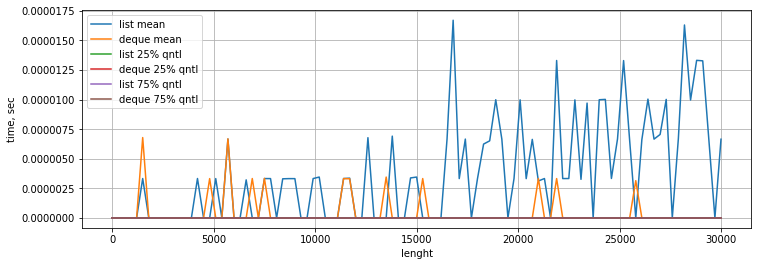

In [85]:
plot_times(list_times, deque_times, 'time, sec')

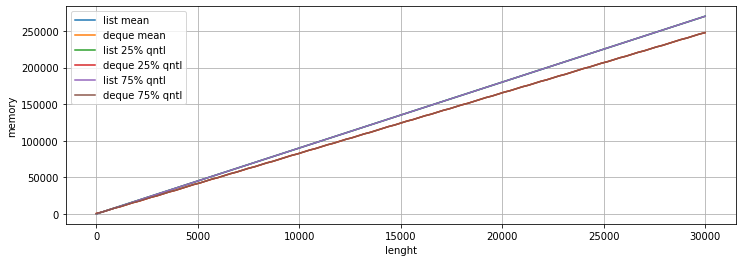

In [86]:
plot_times(list_mems, deque_mems, 'memory')

Время удаления элемента из начала структуры у list растет с его длиной, а у deque кажется что нет

По памяти более затратен также list

**Удаляем элемент из конца**

In [87]:
list_times, list_mems, deque_times, deque_mems = \
    types_speed_comparer(list, deque, (list.pop,), (deque.pop,), 
                         30000, factor=300, stride=300, percentiles=PERCENTILES)

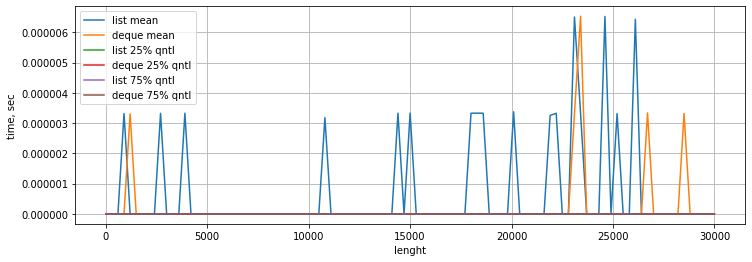

In [88]:
plot_times(list_times, deque_times, 'time, sec')

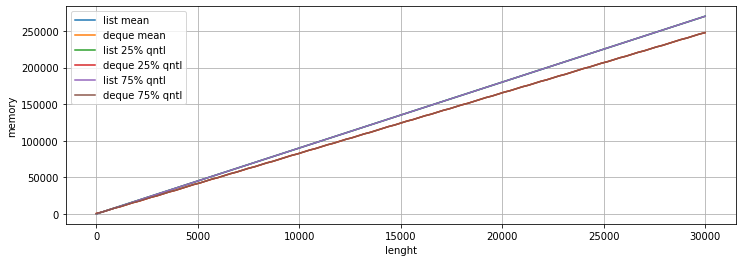

In [89]:
plot_times(list_mems, deque_mems, 'memory')

Время удаления элемента из конца структуры у list и у deque константно

По памяти более затратен также list

**Разворачиваем массив**

In [90]:
list_times, list_mems, deque_times, deque_mems = \
    types_speed_comparer(list, deque, (list.reverse,), (deque.reverse,), 
                         30000, factor=300, stride=300, percentiles=PERCENTILES)

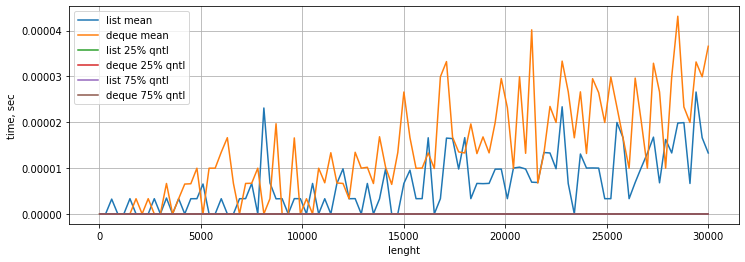

In [91]:
plot_times(list_times, deque_times, 'time, sec')

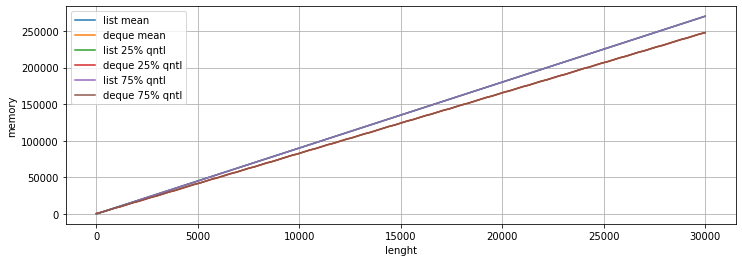

In [92]:
plot_times(list_mems, deque_mems, 'memory')

Время разворота структуры растет, кажется, линейно у обеих структур, но у deque оно всегда больше

По памяти более затратен также list

Что интересно, квантили всегда были нулевые, а это значит, что большая часть событий выполнилась за время = 0. У меня нет ответа, почему, но вообще это интересное наблюдение. Нужно спросить на паре

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количесвто баллов зависит от полноты сравнения.

In [17]:
def custom_permutations(array):
    """
        Функция возвращает последовательные перестановки элементов 
        из итерируемого значения той или иной длины.
        
        :param array: Массив 
        
        :returns: Массив массивов
    """ 
    output = []
    
    if len(array) == 1: 
        yield array
        
    elif len(array) > 1:
        for i in range(len(array)): 
            
            temp_elmt = array[i] 
            temp_list = array[:i] + array[i+1:] 
            
            for output in custom_permutations(temp_list): 
                yield [temp_elmt] + output 
                
    else:
        print('oops')
        return []
    

In [16]:
list(permutations([1,2,3]))


[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [19]:
list(custom_permutations([1,2,3]))

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

In [61]:
itertools_times = []
custom_times = []
itertools_memo = []
custom_memo = []

for i in range(2, 10):
        
    inp = list(np.random.randint(0,9,i))

    time0 = time()
    tmp = list(permutations(inp))
    time1 = time()
    itertools_times.append(time1 - time0)
    itertools_memo.append(memory_usage((permutations, (inp,)))[0])

    time0 = time()
    tmp = list(custom_permutations(inp))
    time1 = time()
    custom_times.append(time1 - time0)
    custom_memo.append(memory_usage((custom_permutations, (inp,)))[0])


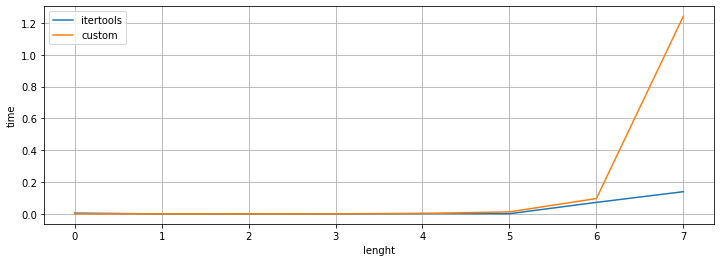

In [62]:
plot_times(itertools_times, custom_times, 'time', label0='itertools', label1='custom', perc=())

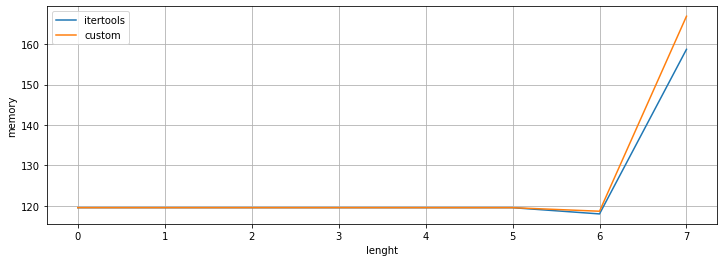

In [63]:
plot_times(itertools_memo, custom_memo, 'memory', label0='itertools', label1='custom', perc=())

Как видим, функция перестановок из библиотеки itertools работает быстрее и потребляет меньше памяти. Вот это да!